<a href="https://colab.research.google.com/github/Ayushsevare/pythonProjectuser2/blob/master/DEEPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = pd.read_csv('/content/500000 Sales Records.csv')

In [3]:
path.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


In [4]:
path.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,2.545300e+04,25453.000000,25453.000000,25453.000000,2.545300e+04,2.545200e+04,2.545200e+04
mean,5.515794e+08,4981.323341,266.227953,187.815449,1.326012e+06,9.361132e+05,3.897324e+05
std,2.613877e+08,2887.644998,217.760463,176.151726,1.472985e+06,1.153189e+06,3.778552e+05
min,1.000149e+08,1.000000,9.330000,6.920000,3.732000e+01,2.768000e+01,9.640000e+00
25%,3.244004e+08,2463.000000,81.730000,35.840000,2.757320e+05,1.623712e+05,9.549860e+04
50%,5.499759e+08,4966.000000,154.060000,97.440000,7.804398e+05,4.610265e+05,2.762904e+05
75%,7.786052e+08,7488.000000,437.200000,364.690000,1.802314e+06,1.191040e+06,5.593060e+05
max,9.999939e+08,10000.000000,668.270000,524.960000,6.682032e+06,5.249600e+06,1.736440e+06


In [5]:
path.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        1
Total Profit      1
dtype: int64

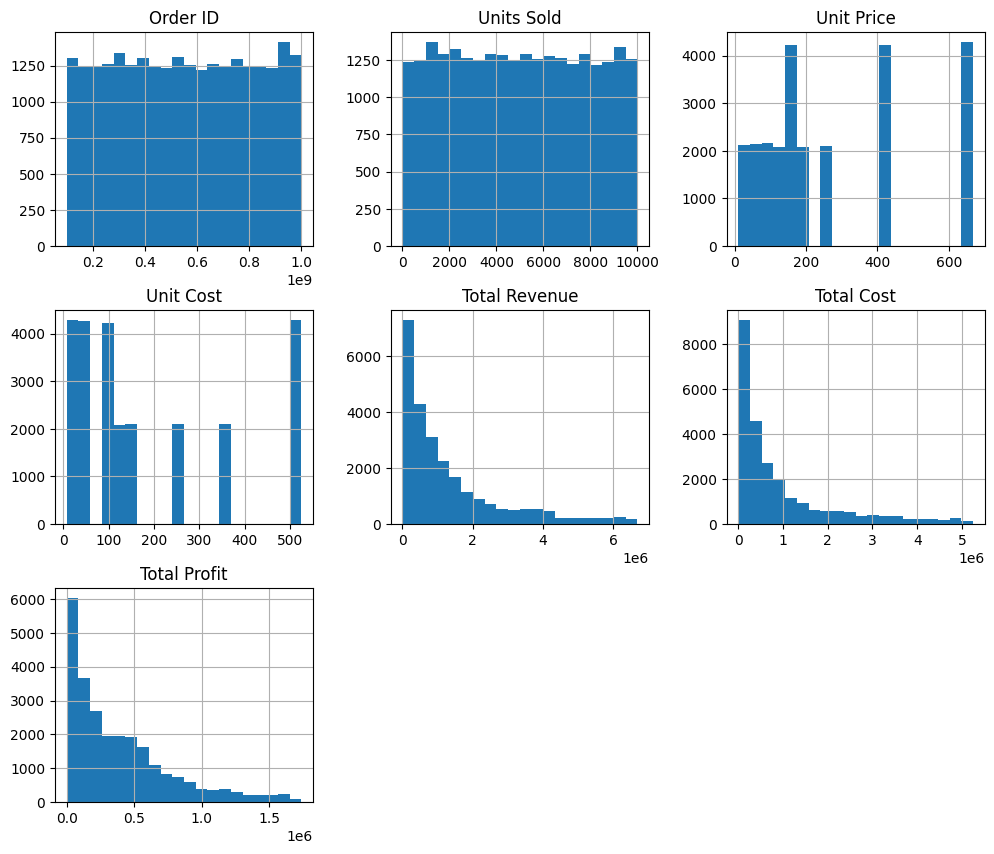

In [6]:
numerical_features = path.select_dtypes(include=['int64', 'float64']).columns
path[numerical_features].hist(figsize=(12, 10), bins=20)
plt.show()

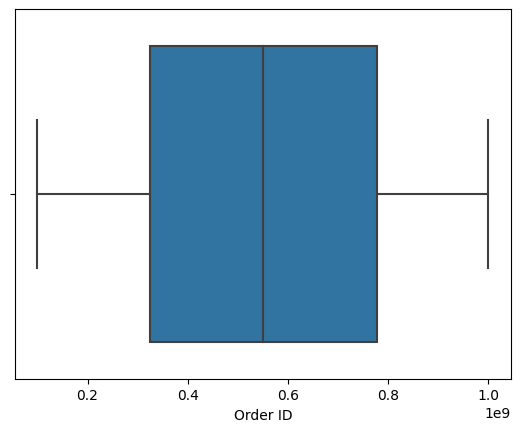

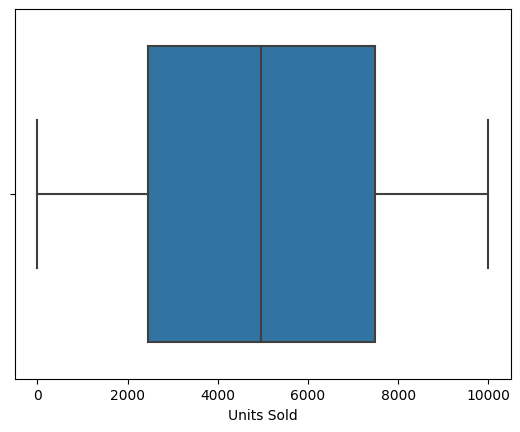

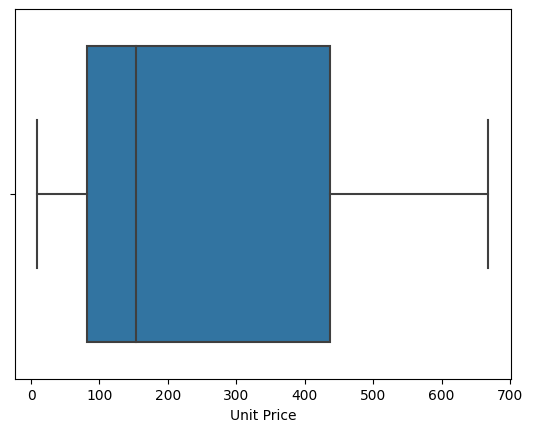

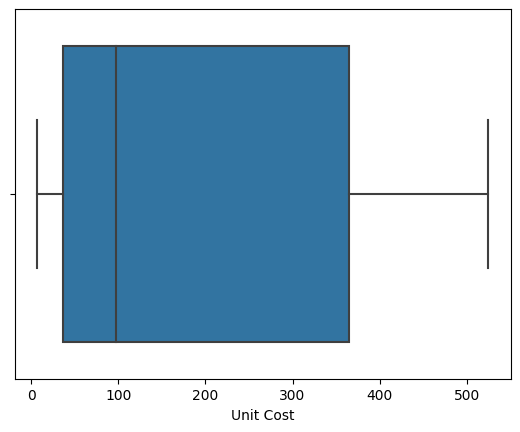

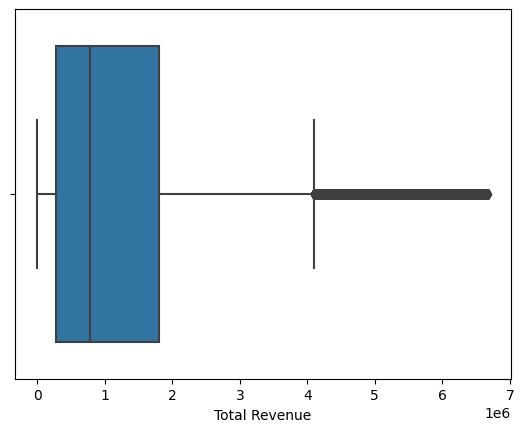

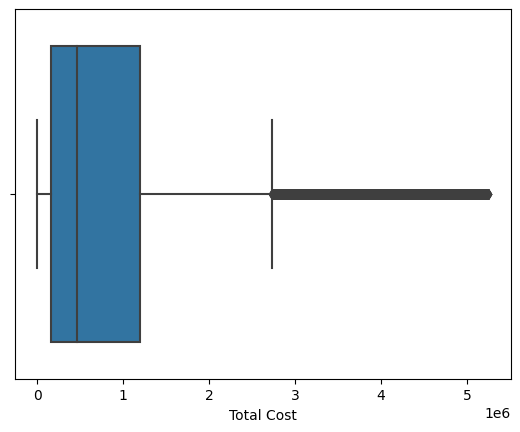

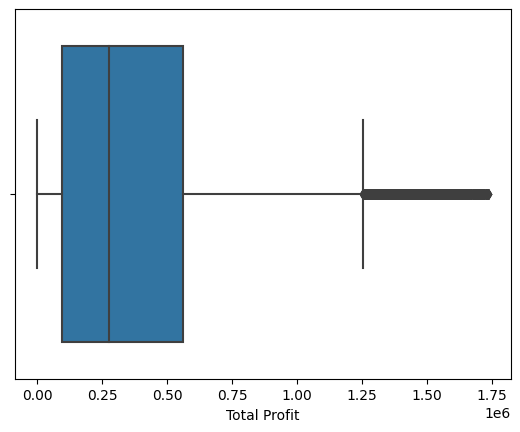

In [7]:
for column in numerical_features:
    sns.boxplot(x=path[column])
    plt.show()

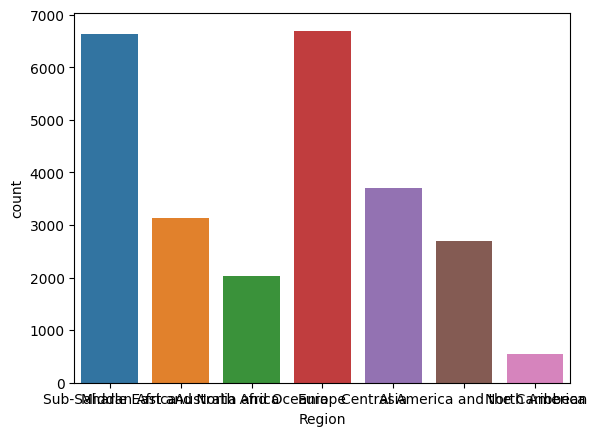

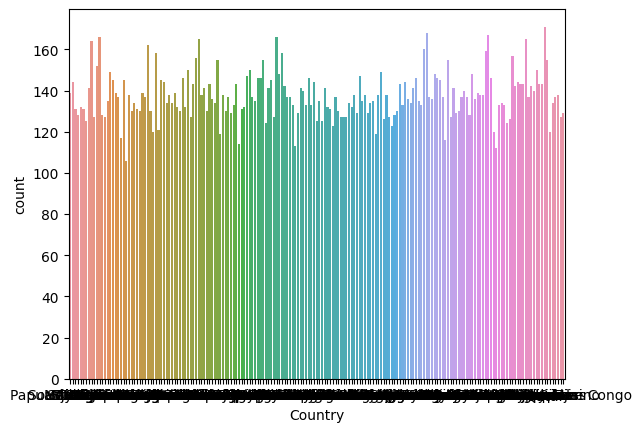

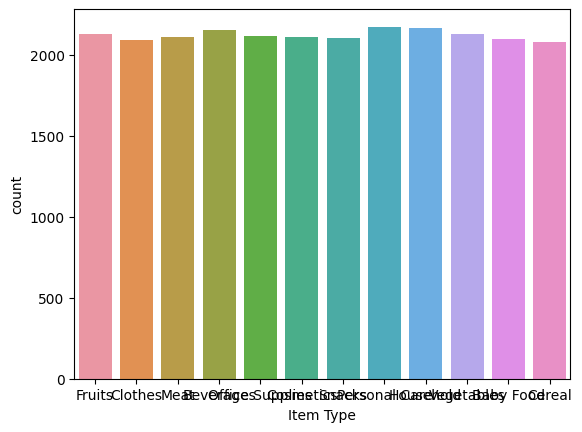

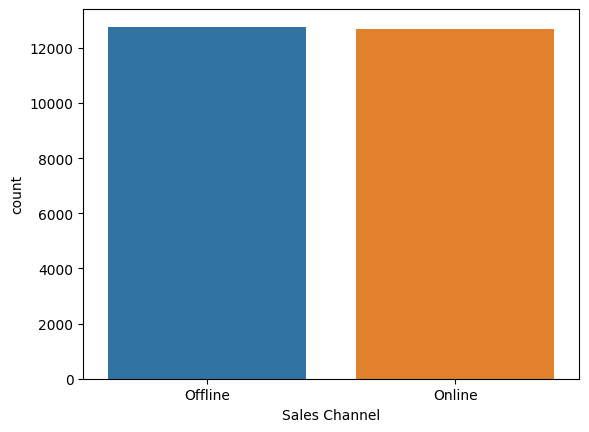

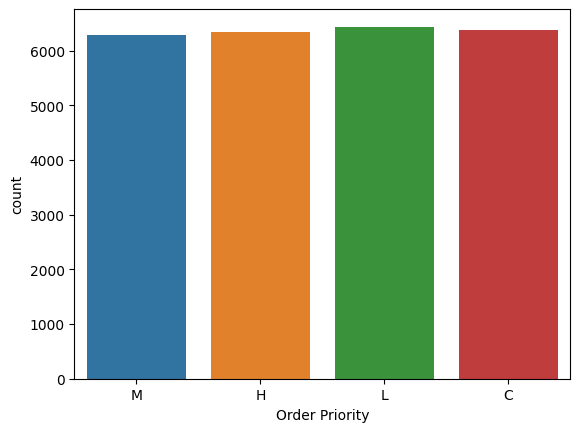

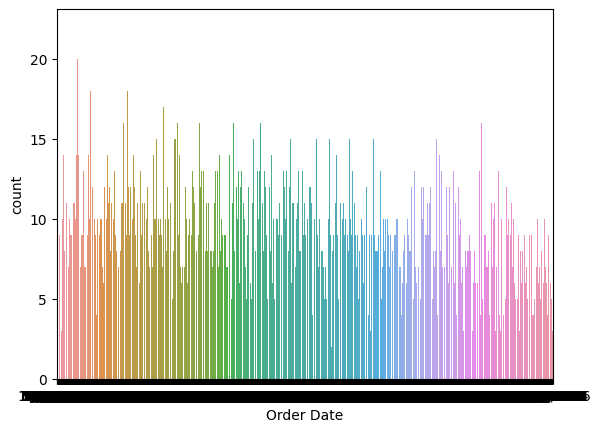

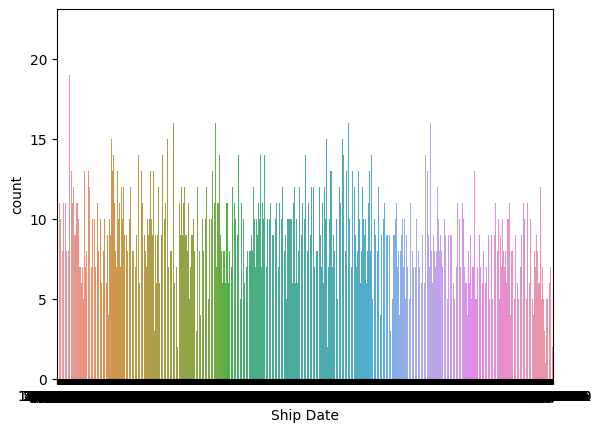

In [8]:
categorical_features = path.select_dtypes(include=['object']).columns
for column in categorical_features:
    sns.countplot(x=path[column])
    plt.show()

<ipython-input-9-d11245a388f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = path.corr()


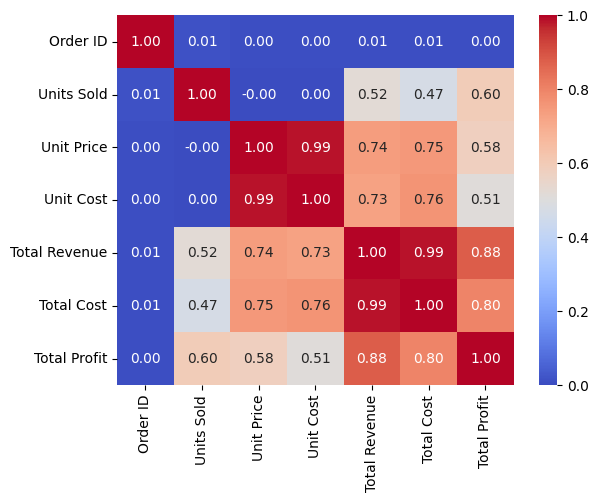

In [9]:
correlation_matrix = path.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<ipython-input-10-d11245a388f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = path.corr()


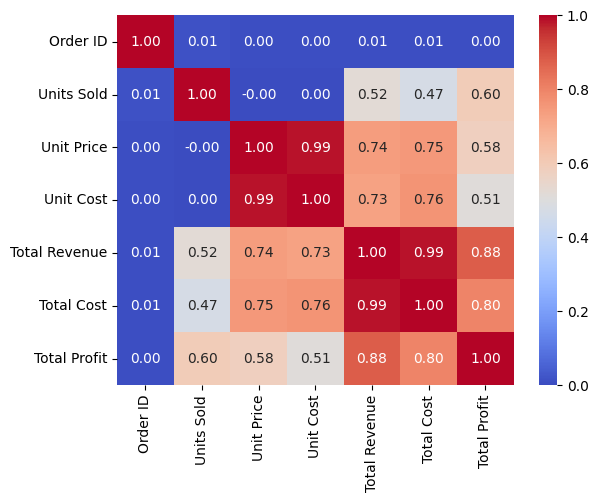

In [10]:
correlation_matrix = path.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

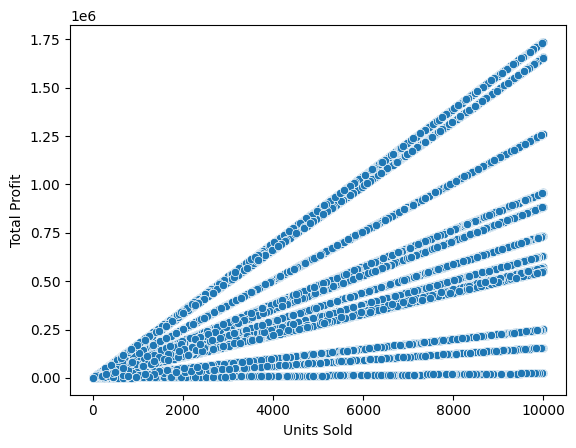

In [11]:
sns.scatterplot(x='Units Sold', y='Total Profit', data=path)
plt.show()

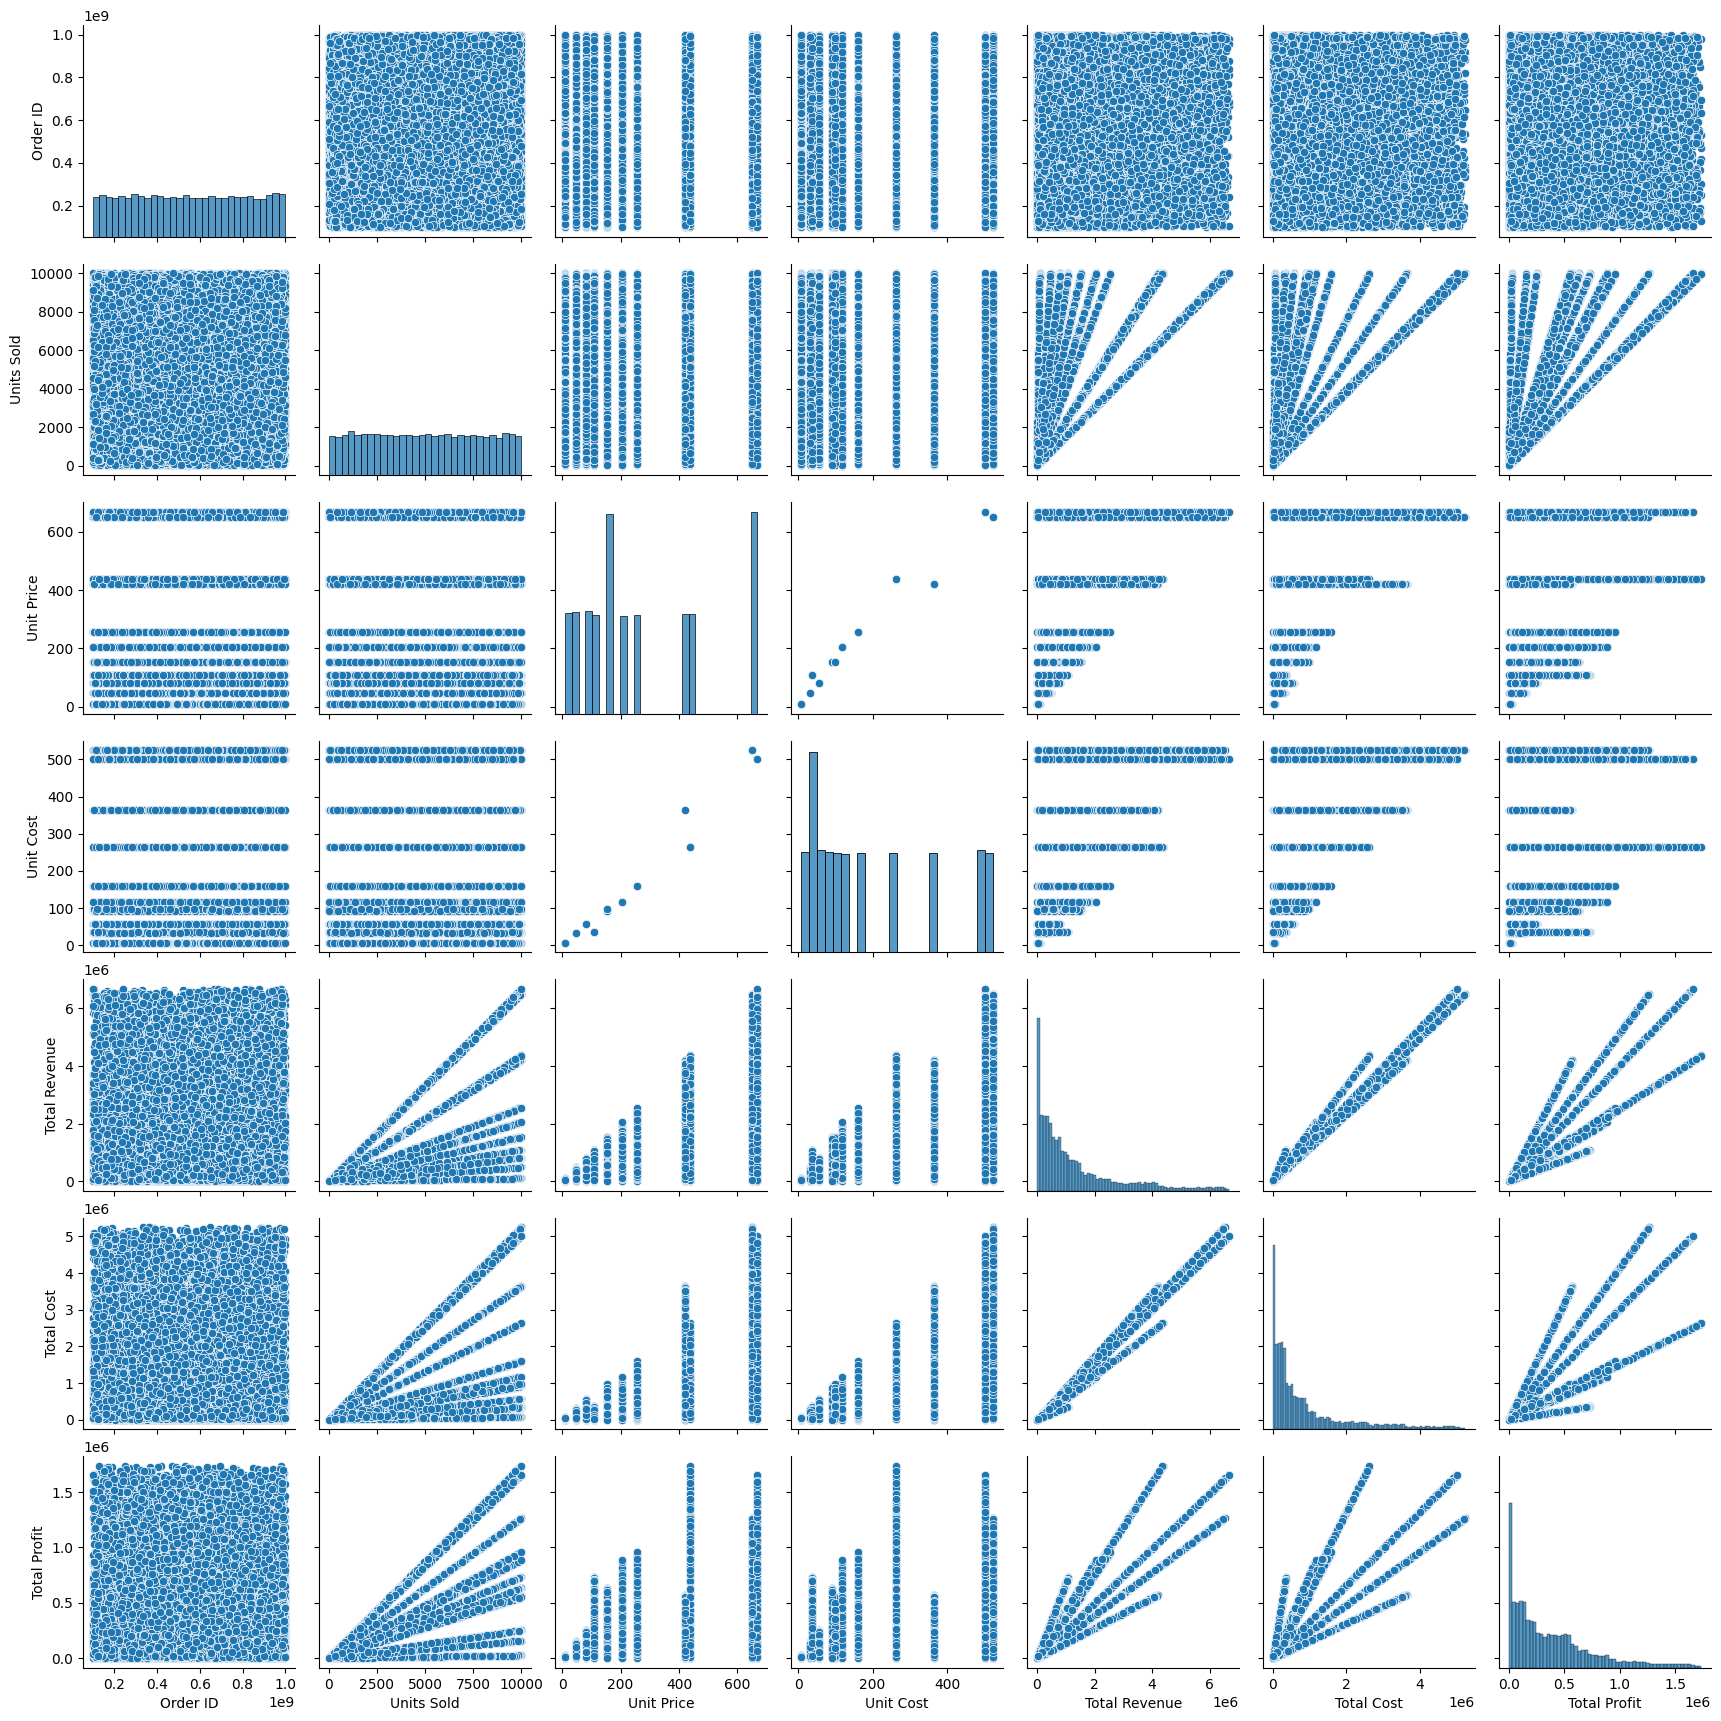

In [12]:
sns.pairplot(path[numerical_features])
plt.show()

In [13]:
print("Missing Values:")
print(path.isnull().sum())

Missing Values:
Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        1
Total Profit      1
dtype: int64


In [14]:
path_cleaned = path.dropna()

In [15]:
duplicate_rows = path_cleaned[path_cleaned.duplicated()]
df_cleaned = path_cleaned.drop_duplicates()

In [16]:
path_cleaned['Order Date'] = pd.to_datetime(path_cleaned['Order Date'])
path_cleaned['Ship Date'] = pd.to_datetime(path_cleaned['Ship Date'])

<ipython-input-16-a25bbe3079ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_cleaned['Order Date'] = pd.to_datetime(path_cleaned['Order Date'])
<ipython-input-16-a25bbe3079ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_cleaned['Ship Date'] = pd.to_datetime(path_cleaned['Ship Date'])


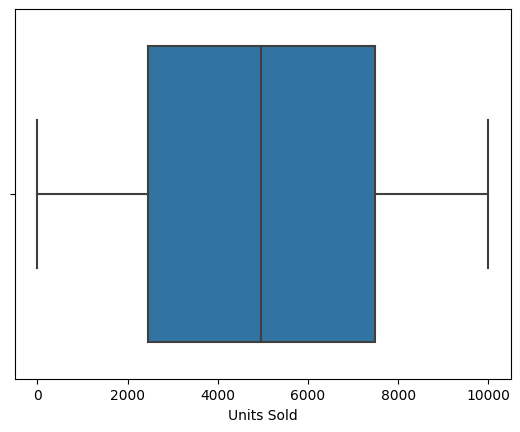

In [17]:
sns.boxplot(x=path_cleaned['Units Sold'])
plt.show()

In [18]:
Q1 = path_cleaned['Units Sold'].quantile(0.25)
Q3 = path_cleaned['Units Sold'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
path_cleaned = path_cleaned[(path_cleaned['Units Sold'] >= lower_bound) & (path_cleaned['Units Sold'] <= upper_bound)]

In [20]:
df_cleaned.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [22]:
path = pd.read_csv('/content/500000 Sales Records.csv')

In [23]:
path.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


In [24]:
numerical_features = path.select_dtypes(include=['int64', 'float64']).columns

In [25]:
scaler = StandardScaler()

In [26]:
path_standardized = pd.DataFrame(scaler.fit_transform(path[numerical_features]), columns=numerical_features)

In [27]:
path_standardized = pd.concat([path[path.columns.difference(numerical_features)], path_standardized], axis=1)


In [28]:
path_standardized.head()

,Country,Item Type,Order Date,Order Priority,Region,Sales Channel,Ship Date,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,South Africa,Fruits,7/27/2012,M,Sub-Saharan Africa,Offline,7/28/2012,-0.416796,-1.170944,-1.181116,-1.027697,-0.891632,-0.803479,-1.020636
1,Morocco,Clothes,9/14/2013,M,Middle East and North Africa,Online,10/19/2013,0.442682,-0.125707,-0.721694,-0.863313,-0.557532,-0.668686,-0.134862
2,Papua New Guinea,Meat,5/15/2015,M,Australia and Oceania,Offline,6/4/2015,1.490663,-1.597974,0.715224,1.005898,-0.798023,-0.698374,-0.976313
3,Djibouti,Clothes,5/17/2017,H,Sub-Saharan Africa,Offline,7/2/2017,1.259971,-1.528015,-0.721694,-0.863313,-0.859828,-0.795510,-0.921595
4,Slovakia,Beverages,10/26/2016,L,Europe,Offline,12/4/2016,-1.447056,-0.346668,-1.005897,-0.886334,-0.772992,-0.702732,-0.866183


In [29]:
min_max_scaler = MinMaxScaler()
path_normalized = pd.DataFrame(min_max_scaler.fit_transform(path[numerical_features]), columns=numerical_features)

In [30]:
path_normalized = pd.concat([path[path.columns.difference(numerical_features)], path_normalized], axis=1)

In [31]:
path_normalized.head()

,Country,Item Type,Order Date,Order Priority,Region,Sales Channel,Ship Date,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,South Africa,Fruits,7/27/2012,M,Sub-Saharan Africa,Offline,7/28/2012,0.381513,0.159216,0.000000,0.000000,0.002219,0.002095,0.002205
1,Morocco,Clothes,9/14/2013,M,Middle East and North Africa,Online,10/19/2013,0.630658,0.461046,0.151683,0.055826,0.075405,0.031475,0.195011
2,Papua New Guinea,Meat,5/15/2015,M,Australia and Oceania,Offline,6/4/2015,0.934445,0.035904,0.626096,0.690622,0.022724,0.025004,0.011853
3,Djibouti,Clothes,5/17/2017,H,Sub-Saharan Africa,Offline,7/2/2017,0.867572,0.056106,0.151683,0.055826,0.009186,0.003832,0.023763
4,Slovakia,Beverages,10/26/2016,L,Europe,Offline,12/4/2016,0.082863,0.397240,0.057850,0.048008,0.028207,0.024054,0.035825


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
file_path = '/content/500000 Sales Records.csv'

In [34]:
df = pd.read_csv(file_path)

In [35]:
categorical_columns = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority']

In [36]:
numerical_columns = ['Units Sold', 'Unit Price', 'Unit Cost']

In [37]:
X = df[numerical_columns + categorical_columns]
y = df['Total Profit']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=[np.object]).columns

<ipython-input-39-cacf34294f41>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = X.select_dtypes(include=[np.object]).columns


In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

In [41]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [42]:
y_train_dense = y_train.to_numpy()
y_test_dense = y_test.to_numpy()

In [43]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [44]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [45]:
model.fit(X_train_scaled, y_train_dense, epochs=25, batch_size=32, validation_data=(X_test_scaled, y_test_dense))

Epoch 1/25
849/849 [==============================] - 3s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/25
849/849 [==============================] - 2s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/25
849/849 [==============================] - 3s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/25
849/849 [==============================] - 3s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/25
849/849 [==============================] - 2s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/25
849/849 [==============================] - 2s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/25
849/849 [==============================] - 2s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/25
849/849 [==============================] - 2s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/25
849/849 [====================

In [46]:
y_train_dense = y_train.to_numpy()
y_test_dense = y_test.to_numpy()

In [47]:
X_test_dense = X_test_scaled.toarray()

In [48]:
X_test_dense = np.array(X_test_dense, dtype=np.float32)  # Adjust dtype as needed

In [49]:
loss, mae = model.evaluate(X_test_dense, y_test_dense)
print(f'Test Mean Absolute Error: {mae}')

213/213 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Test Mean Absolute Error: nan


In [50]:
predictions = model.predict(X_test_dense)

213/213 [==============================] - 0s 1ms/step


In [51]:
predictions = model.predict(X_test_scaled)

213/213 [==============================] - 0s 1ms/step


In [52]:
df_test = X_test.copy()
df_test['Total Profit'] = y_test
df_test['Predicted Profit'] = predictions

In [53]:
total_profit_by_region = df_test.groupby('Region')['Total Profit', 'Predicted Profit'].sum()

<ipython-input-53-70a2658c7e55>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_profit_by_region = df_test.groupby('Region')['Total Profit', 'Predicted Profit'].sum()


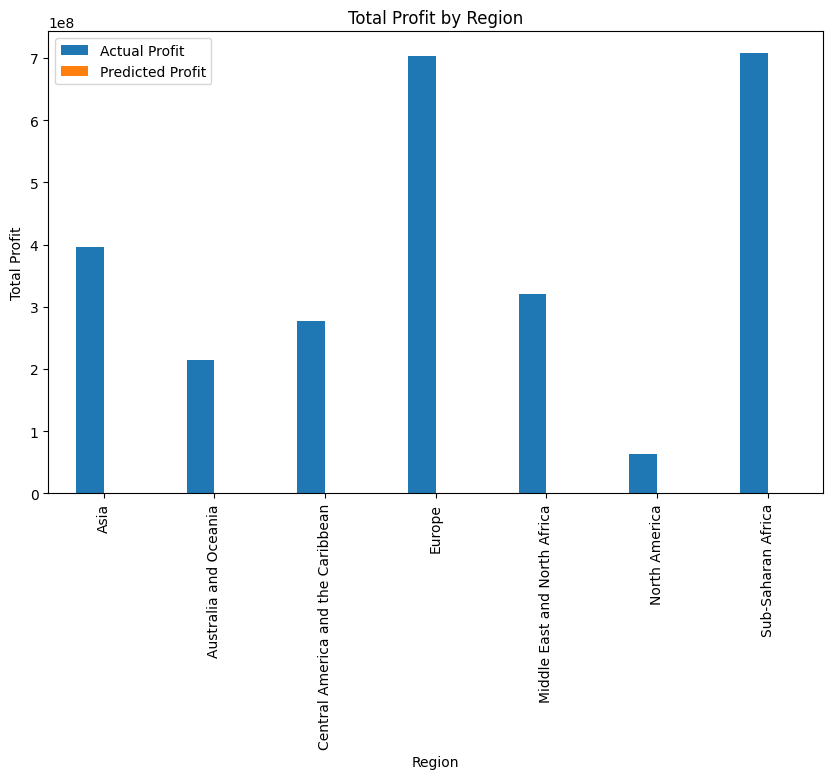

In [54]:
total_profit_by_region.plot(kind='bar', figsize=(10, 6))
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.legend(['Actual Profit', 'Predicted Profit'])
plt.show()